<a href="https://colab.research.google.com/github/kangmg/asedias/blob/main/notebook/asedias_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!uv pip install git+https://github.com/kangmg/asedias.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
# frag selector helper
!uv pip install git+https://github.com/kangmg/aseview.git -q

In [7]:
# sample traj data
!wget -q https://raw.githubusercontent.com/kangmg/ase-distortion-interaction/refs/heads/main/examples/DA.xyz -O DA.xyz
!wget -q https://raw.githubusercontent.com/kangmg/ase-distortion-interaction/refs/heads/main/examples/wittig.xyz -O wittig.xyz
!wget -q https://raw.githubusercontent.com/kangmg/ase-distortion-interaction/refs/heads/main/examples/fluoroethane.xyz -O fluoroethane.xyz
!wget -q https://github.com/kangmg/wget_repo/raw/refs/heads/main/irc_rearraged.traj -O butene.traj
!wget -q https://raw.githubusercontent.com/kangmg/aimDIAS/refs/heads/main/examples/sn2.xyz -O sn2.xyz

In [ ]:
from ase.io import read
from aseview import fragment_selector

DA_images = read('DA.xyz', index=':')
fragment_selector(DA_images[0])

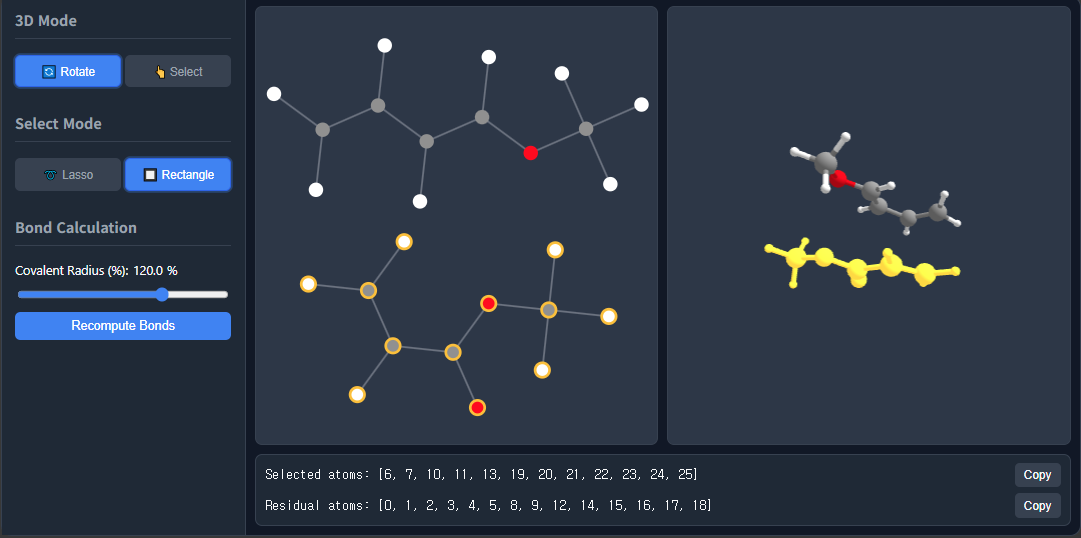

In [4]:
# g-xTB : recent Grimme's extended tight binding method
!uv pip install git+https://github.com/kangmg/g-xtb.git -q

Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Total Energies


100%|██████████| 101/101 [00:11<00:00,  9.10it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Optimize Fragments


  0%|          | 0/2 [00:00<?, ?it/s]

      Step     Time          Energy          fmax
BFGS:    0 04:43:13    -8339.739289        0.349073
BFGS:    1 04:43:14    -8339.745762        0.271501
BFGS:    2 04:43:15    -8339.749353        0.327198
BFGS:    3 04:43:16    -8339.750602        0.127409
BFGS:    4 04:43:17    -8339.751019        0.082671
BFGS:    5 04:43:18    -8339.751429        0.055891
BFGS:    6 04:43:19    -8339.751724        0.061211
BFGS:    7 04:43:20    -8339.752052        0.056880
BFGS:    8 04:43:21    -8339.752285        0.043923


 50%|█████     | 1/2 [00:08<00:08,  8.60s/it]

      Step     Time          Energy          fmax
BFGS:    0 04:43:23    -7360.479005        0.727359
BFGS:    1 04:43:24    -7360.487507        0.550219
BFGS:    2 04:43:25    -7360.492841        0.191079
BFGS:    3 04:43:27    -7360.495243        0.124789
BFGS:    4 04:43:28    -7360.496675        0.137737
BFGS:    5 04:43:29    -7360.497430        0.089163
BFGS:    6 04:43:30    -7360.498056        0.101404
BFGS:    7 04:43:31    -7360.498587        0.103264
BFGS:    8 04:43:33    -7360.499055        0.067114
BFGS:    9 04:43:35    -7360.499445        0.054061
BFGS:   10 04:43:36    -7360.499771        0.047818


100%|██████████| 2/2 [00:23<00:00, 11.86s/it]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Fragment Energies


100%|██████████| 202/202 [00:08<00:00, 23.63it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies


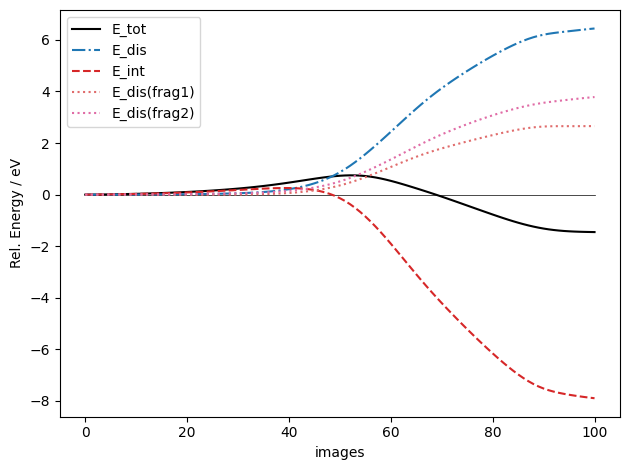

In [7]:
from gxtb import gxTB
from asedias.core import Fragment, aseDIAS
from ase.io import read

images = read('DA.xyz', index=':')

def attach_gxtb(atoms, spin, charge,):
    """Attach a calculator to the atoms."""
    calc = gxTB(uhf=spin, charge=charge)
    atoms.calc = calc


# Define fragments as Fragment objects
frag1 = Fragment(index=[6, 7, 10, 11, 13, 19, 20, 21, 22, 23, 24, 25], charge=0, spin=0, frag_name='frag1')
frag2 = Fragment(index=[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 16, 17, 18], charge=0, spin=0, frag_name='frag2')

analysis = aseDIAS(images=images, fragments=[frag1, frag2, ], calc_attach=attach_gxtb, )
analysis.run()
plot = analysis.plot(marker=False)

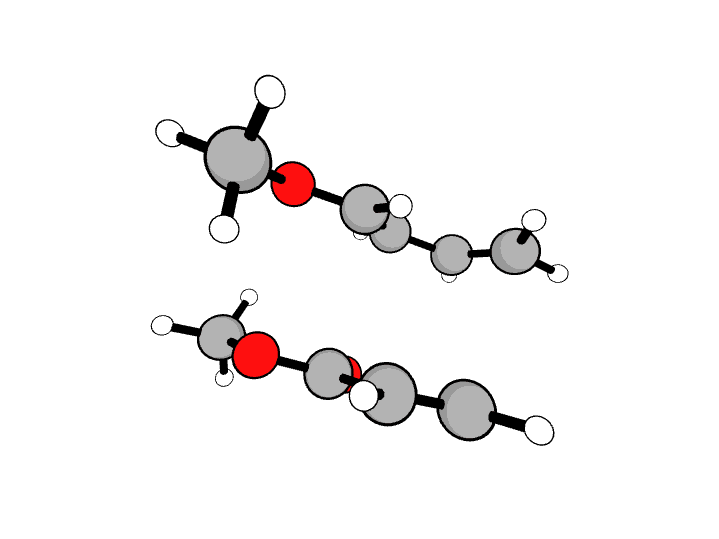

In [8]:
#!uv pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu -q
!uv pip install git+https://github.com/isayevlab/aimnetcentral.git -q


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Total Energies


  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████| 59/59 [00:03<00:00, 16.93it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Optimize Fragments


  0%|          | 0/2 [00:00<?, ?it/s]

      Step     Time          Energy          fmax
BFGS:    0 04:44:43    -2727.890812        2.429440
BFGS:    1 04:44:43    -2728.059706        2.527869
BFGS:    2 04:44:43    -2729.378581        4.865547
BFGS:    3 04:44:43    -2731.567030        6.266655
BFGS:    4 04:44:43    -2734.195324        5.819740
BFGS:    5 04:44:43    -2732.387945       28.772312
BFGS:    6 04:44:44    -2734.551665        4.553324
BFGS:    7 04:44:44    -2734.725468        3.086814
BFGS:    8 04:44:44    -2734.821581        1.655882
BFGS:    9 04:44:44    -2734.842004        0.355034
BFGS:   10 04:44:44    -2734.843143        0.030118


 50%|█████     | 1/2 [00:00<00:00,  2.74it/s]

      Step     Time          Energy          fmax
BFGS:    0 04:44:44    -2137.593097        7.076658
BFGS:    1 04:44:44    -2138.607223        3.340148
BFGS:    2 04:44:44    -2139.101235        4.057580
BFGS:    3 04:44:44    -2139.621193        1.176629
BFGS:    4 04:44:44    -2139.801425        1.877991
BFGS:    5 04:44:44    -2139.829334        0.216007
BFGS:    6 04:44:44    -2139.831977        0.166240
BFGS:    7 04:44:44    -2139.835161        0.118365
BFGS:    8 04:44:44    -2139.837312        0.098936
BFGS:    9 04:44:44    -2139.838195        0.063733
BFGS:   10 04:44:44    -2139.838400        0.026940


100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Fragment Energies


100%|██████████| 118/118 [00:00<00:00, 132.56it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies


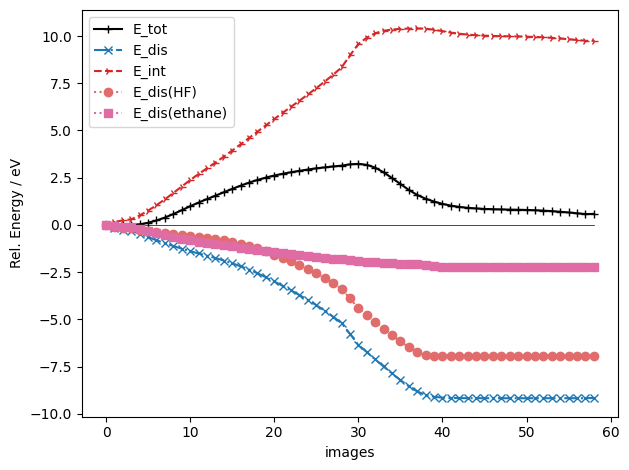

In [10]:
from aimnet.calculators import AIMNet2ASE
from asedias.core import Fragment, aseDIAS
from ase.io import read

images = read('fluoroethane.xyz', index=':')

def attach_aimnet2(atoms, spin, charge):
    """Attach a calculator to the atoms."""
    calc = AIMNet2ASE('aimnet2nse', charge=charge, mult=spin * 2 + 1)
    atoms.calc = calc

# Define fragments as Fragment objects
frag1 = Fragment(index=[2, 7], charge=0, spin=0, frag_name='HF')
frag2 = Fragment(index=[0, 1, 3, 4, 5, 6], charge=0, spin=0, frag_name='ethane')

analysis = aseDIAS(images=images, fragments=[frag1, frag2, ], calc_attach=attach_aimnet2, )
analysis.run()
plot = analysis.plot()

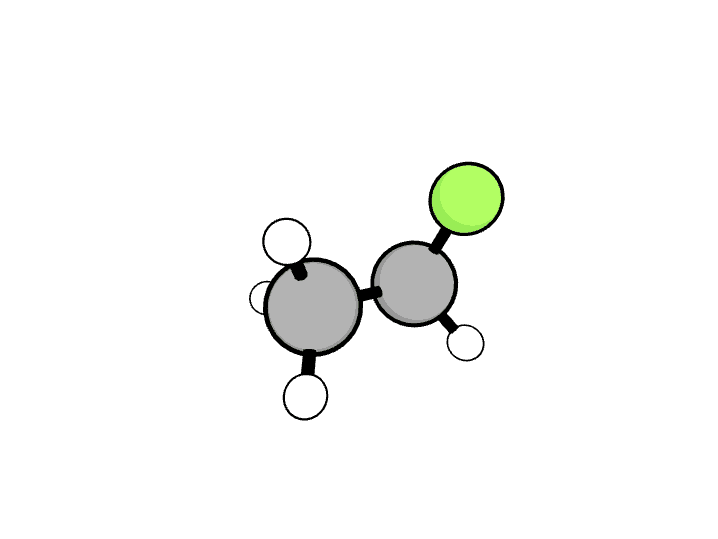

In [2]:
!uv pip install condacolab -q
import condacolab

condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [ ]:
%%capture
!mamba install -c conda-forge tblite
!mamba install -c conda-forge tblite-python

Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Total Energies




  0%|          | 0/79 [00:00<?, ?it/s]

  1%|▏         | 1/79 [00:00<00:12,  6.07it/s]

  6%|▋         | 5/79 [00:00<00:03, 19.00it/s]

 11%|█▏        | 9/79 [00:00<00:02, 24.24it/s]

 16%|█▋        | 13/79 [00:00<00:02, 27.48it/s]

 20%|██        | 16/79 [00:00<00:02, 28.09it/s]

 24%|██▍       | 19/79 [00:00<00:02, 28.61it/s]

 28%|██▊       | 22/79 [00:00<00:01, 28.79it/s]

 33%|███▎      | 26/79 [00:00<00:01, 29.22it/s]

 37%|███▋      | 29/79 [00:01<00:01, 29.33it/s]

 42%|████▏     | 33/79 [00:01<00:01, 30.06it/s]

 47%|████▋     | 37/79 [00:01<00:01, 29.83it/s]

 51%|█████     | 40/79 [00:01<00:01, 29.75it/s]

 54%|█████▍    | 43/79 [00:01<00:01, 29.05it/s]

 59%|█████▉    | 47/79 [00:01<00:01, 29.70it/s]

 63%|██████▎   | 50/79 [00:01<00:00, 29.73it/s]

 68%|██████▊   | 54/79 [00:01<00:00, 30.62it/s]

 73%|███████▎  | 58/79 [00:02<00:00, 30.80it/s]

 78%|███████▊  | 62/79 [00:02<00:00, 31.24it/s]

 84%|████████▎ | 66/79 [00:02<00:00, 31.78it/s]

 89%|████████▊ | 70/79 [00:02<

Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Optimize Fragments




  0%|          | 0/2 [00:00<?, ?it/s]

      Step     Time          Energy         fmax
BFGS:    0 05:13:01    -4278.841260        7.0682
BFGS:    1 05:13:01    -4279.793107        2.8528
BFGS:    2 05:13:01    -4280.100415        2.4170
BFGS:    3 05:13:01    -4280.398220        0.9441
BFGS:    4 05:13:01    -4280.479233        0.7965
BFGS:    5 05:13:01    -4280.545254        0.9535
BFGS:    6 05:13:01    -4280.632274        0.9135
BFGS:    7 05:13:01    -4280.705395        0.7431
BFGS:    8 05:13:01    -4280.763288        0.5567
BFGS:    9 05:13:01    -4280.798803        0.4434
BFGS:   10 05:13:01    -4280.816841        0.2877
BFGS:   11 05:13:01    -4280.823310        0.1399
BFGS:   12 05:13:01    -4280.825197        0.1256
BFGS:   13 05:13:01    -4280.826609        0.0958
BFGS:   14 05:13:01    -4280.827619        0.1087
BFGS:   15 05:13:01    -4280.828245        0.0600
BFGS:   16 05:13:01    -4280.828643        0.0534
BFGS:   17 05:13:02    -4280.828963        0.0551
BFGS:   18 05:13:02    -4280.829338        0.0623
B



 50%|█████     | 1/2 [00:01<00:01,  1.78s/it]

      Step     Time          Energy         fmax
BFGS:    0 05:13:03   -30261.303112        7.7532
BFGS:    1 05:13:03   -30262.462482        3.6665
BFGS:    2 05:13:03   -30262.863906        7.0445
BFGS:    3 05:13:03   -30263.184964        1.6514
BFGS:    4 05:13:03   -30263.302263        1.5687
BFGS:    5 05:13:03   -30263.456001        1.0512
BFGS:    6 05:13:03   -30263.511457        0.7663
BFGS:    7 05:13:03   -30263.581914        0.6730
BFGS:    8 05:13:04   -30263.615712        0.5566
BFGS:    9 05:13:04   -30263.639300        0.3264
BFGS:   10 05:13:04   -30263.658745        0.2880
BFGS:   11 05:13:04   -30263.672279        0.2438
BFGS:   12 05:13:04   -30263.679009        0.2394
BFGS:   13 05:13:04   -30263.683487        0.1738
BFGS:   14 05:13:04   -30263.688107        0.1825
BFGS:   15 05:13:04   -30263.694341        0.2566
BFGS:   16 05:13:04   -30263.701993        0.2916
BFGS:   17 05:13:04   -30263.709717        0.1917
BFGS:   18 05:13:04   -30263.716166        0.1756
B



100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Fragment Energies




  0%|          | 0/158 [00:00<?, ?it/s]

  5%|▌         | 8/158 [00:00<00:01, 76.53it/s]

 11%|█▏        | 18/158 [00:00<00:01, 85.00it/s]

 18%|█▊        | 28/158 [00:00<00:01, 89.65it/s]

 23%|██▎       | 37/158 [00:00<00:01, 70.57it/s]

 30%|██▉       | 47/158 [00:00<00:01, 78.60it/s]

 36%|███▌      | 57/158 [00:00<00:01, 84.29it/s]

 42%|████▏     | 67/158 [00:00<00:01, 87.69it/s]

 49%|████▊     | 77/158 [00:00<00:00, 87.63it/s]

 54%|█████▍    | 86/158 [00:01<00:00, 73.10it/s]

 59%|█████▉    | 94/158 [00:01<00:01, 62.84it/s]

 64%|██████▍   | 101/158 [00:01<00:00, 58.56it/s]

 68%|██████▊   | 108/158 [00:01<00:00, 54.04it/s]

 72%|███████▏  | 114/158 [00:01<00:00, 52.33it/s]

 76%|███████▌  | 120/158 [00:01<00:00, 50.86it/s]

 80%|███████▉  | 126/158 [00:01<00:00, 50.19it/s]

 84%|████████▎ | 132/158 [00:02<00:00, 43.55it/s]

 87%|████████▋ | 137/158 [00:02<00:00, 42.09it/s]

 90%|████████▉ | 142/158 [00:02<00:00, 40.04it/s]

 93%|█████████▎| 147/158 [00:02<00:00, 35.61it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies


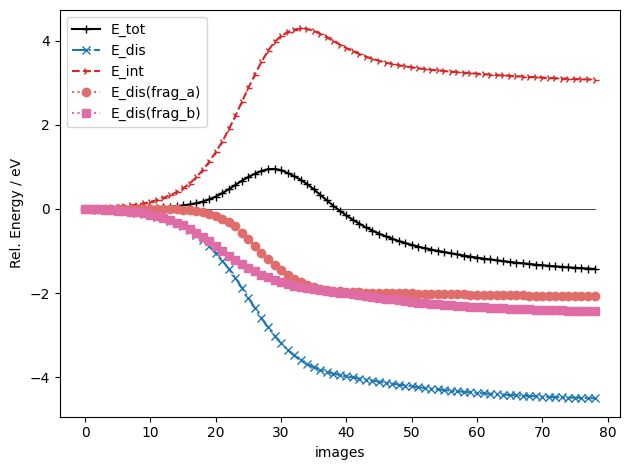

In [10]:
from aimnet.calculators import AIMNet2ASE
from asedias.core import Fragment, aseDIAS
from ase.io import read
from asedias import ParameterManager

ParameterManager.opt_steps = 300

images = read('wittig.xyz', index=':')

# preopt calc
def attach_aimnet2(atoms, spin, charge):
    """Attach a calculator to the atoms."""
    calc = AIMNet2ASE('aimnet2nse', charge=charge, mult=spin * 2 + 1)
    atoms.calc = calc

# Define fragments as Fragment objects
frag1 = Fragment(index=[0, 1, 4, 38, 39, 40, 41, 42, 43, 44, 45, 46], charge=0, spin=0, frag_name='frag_a')
frag2 = Fragment(index=[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], charge=0, spin=0, frag_name='frag_b')

analysis = aseDIAS(images=images, fragments=[frag1, frag2, ], calc_attach=attach_aimnet2)
analysis.run()
plot = analysis.plot()

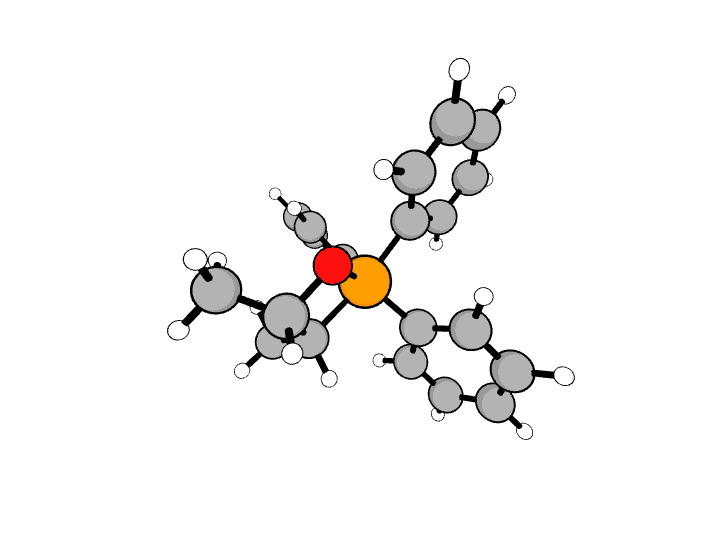

In [11]:
print(ParameterManager)

optimizer         : <class 'ase.optimize.bfgs.BFGS'>
preopt_fmax       : 0.05
preopt_steps      : 100
opt_fmax          : 0.05
opt_steps         : 300
marker            : True
linestyle         : True
hline             : True
include_fragments : True
yaxis_unit        : eV


In [16]:
!uv pip install torchani -q

In [18]:
%%capture
%%time
from tblite.ase import TBLite
import torchani
from asedias.core import Fragment, aseDIAS
from ase.io import read
import numpy as np

images = read('butene.traj', index=':')

# preopt calc
def attach_ani2x(atoms, **kwargs):
    """
    ANI does not support spin & charge
    """
    calc = torchani.models.ANI2x().ase()
    atoms.calc = calc

# opt calc
def attach_xtb(atoms, spin, charge,):
    """Attach a calculator to the atoms."""
    calc = TBLite(uhf=spin, charge=charge, method='GFN2-xTB')
    atoms.calc = calc

# Define fragments as Fragment objects
frag1 = Fragment(index=[0, 1, 4, 5, 6, 7], charge=0, spin=1, frag_name='frag_a')
frag2 = Fragment(index=[2, 3, 8, 9, 10, 11], charge=0, spin=1, frag_name='frag_b')

analysis = aseDIAS(images=images, fragments=[frag1, frag2, ], calc_attach=attach_xtb, precalc_attach=attach_ani2x)
analysis.run()

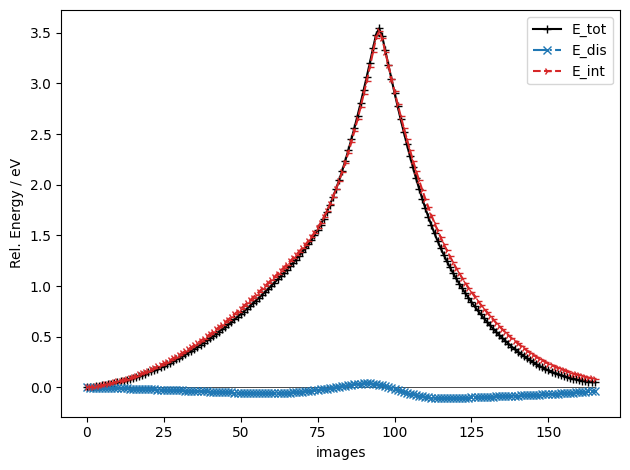

In [23]:
_ = analysis.plot(include_fragments=False)

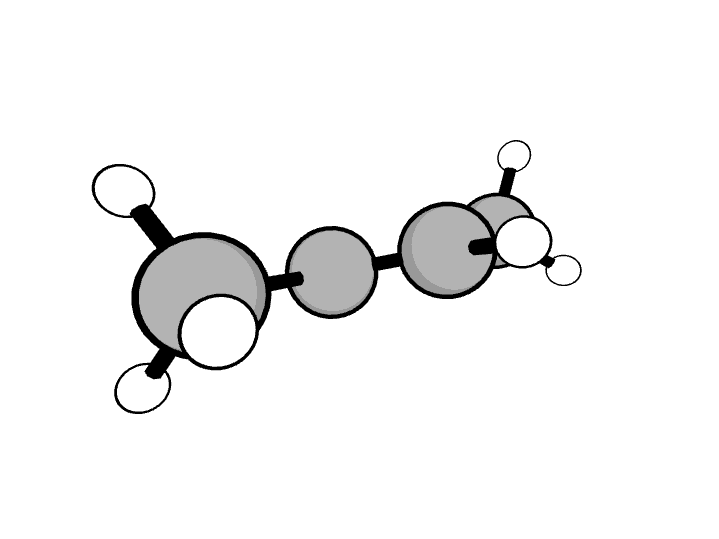

In [26]:
!uv pip install git+https://github.com/kangmg/PySCF4ASE.git -q

Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Total Energies



100%|██████████| 10/10 [00:55<00:00,  5.58s/it]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Optimize Fragments



  0%|          | 0/3 [00:00<?, ?it/s]

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -4.332231166472  -4.3322312E+00   1.1664237E-01
      2     -4.332231166472   0.0000000E+00   6.9985421E-02
      3     -4.332231166472   0.0000000E+00   4.1987054E-06
------------------------------------------------------------

 total:                                   0.001 sec
3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([-1.22465213e+00, -1.02749512e+00, -3.76055499e-04])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([-1.22465213e+00, -1.02749512e+00, -3.76055499e-04]), 'molecular-quadrupole': array([-9.71899670e-01, -3.77497226e+00, -3.05859721e-01, -1.38161151e-03,
       -1.15918557e-03,  1.27775939e+00])}
      Step     Time          Energy         fmax
BFGS:    0 05:38:45     -117.886015        0.0000
      Step     Time         


 33%|███▎      | 1/3 [00:01<00:03,  1.82s/it]

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -4.785133953761  -4.7851340E+00   1.1664237E-01
      2     -4.785133953761   0.0000000E+00   6.9985421E-02
      3     -4.785133953761   0.0000000E+00   4.1987054E-06
------------------------------------------------------------

 total:                                   0.001 sec
3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([ 8.31999548e+00, -1.08102350e+00, -4.28967831e-04])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([ 8.31999548e+00, -1.08102350e+00, -4.28967831e-04]), 'molecular-quadrupole': array([-6.86380188e+01,  2.69823319e+01,  3.34425507e+01,  1.07070312e-02,
       -1.39117292e-03,  3.51954681e+01])}
      Step     Time          Energy         fmax
BFGS:    0 05:38:47     -130.210127        0.0000
      Step     Time         


 67%|██████▋   | 2/3 [00:02<00:01,  1.02s/it]

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -2.990367318552  -3.0428202E+00   3.3913697E-01
      2     -2.990866877315  -4.9955876E-04   2.0198765E-01
      3     -2.991211694184  -3.4481687E-04   8.2584577E-03
      4     -2.991215586642  -3.8924578E-06   4.4263832E-03
      5     -2.991215499534   8.7107817E-08   3.0101980E-04
      6     -2.991215675590  -1.7605582E-07   8.2983592E-05
      7     -2.991215678471  -2.8812228E-09   9.7153676E-06
------------------------------------------------------------

 total:                                   0.002 sec
3
{'bond-orders': array([[0.00000000e+00, 9.15865131e-01, 9.15857876e-01, 9.15870790e-01],
       [9.15865131e-01, 0.00000000e+00, 6.40369133e-05, 6.60257023e-05],
       [9.15857876e-01, 6.40369133e-05, 0.00000000e+00, 6.49149593e-05],
       [9.15870790e-01, 6.60257023e-05, 6.49149


100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Fragment Energies



100%|██████████| 30/30 [00:21<00:00,  1.43it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies


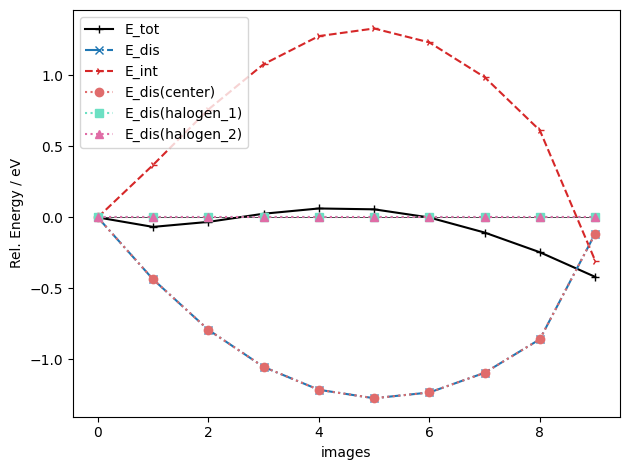

In [38]:
from asedias.core import Fragment, aseDIAS
from ase.io import read
from pyscf4ase.dft import PySCFCalculator
from gxtb import gxTB

images = read('sn2.xyz', index='::2')


# preopt calc
def attach_gxtb(atoms, spin, charge,):
    """Attach a calculator to the atoms."""
    calc = gxTB(uhf=spin, charge=charge)
    atoms.calc = calc

# calc
def simple_dft_attach(atoms, spin, charge):
    """
    Attach a low level dft calculator to the atoms.
    """
    calc = PySCFCalculator(charge=charge, spin=spin)
    calc.parameters.xc = 'lda,vwn'
    calc.parameters.basis = '6-31g*'
    calc.parameters.device = 'cpu'
    calc.parameters.verbose = -1

    atoms.calc = calc


# Define fragments as Fragment objects
frag_halo_2 = Fragment(index=[5], charge=-1, spin=0, frag_name='halogen_2')
frag_halo_1 = Fragment(index=[1], charge=-1, spin=0, frag_name='halogen_1')
frag_center = Fragment(index=[0, 2, 3, 4], charge=+1, spin=0, frag_name='center')

analysis = aseDIAS(images=images, fragments=[frag_halo_1, frag_halo_2, frag_center], calc_attach=simple_dft_attach, precalc_attach=attach_xtb)
analysis.run()
plot = analysis.plot()

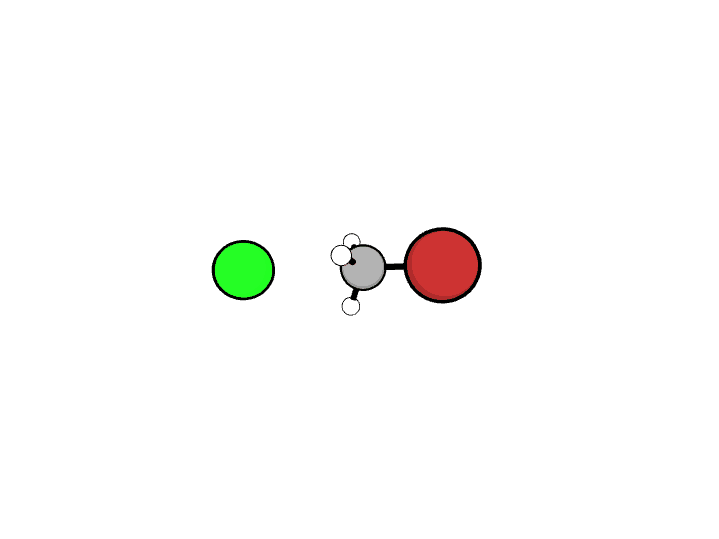